# 分析Airbnb

In [1]:
# 把紅色警告的字隱藏
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 匯入CSV檔案
import pandas as pd
df = pd.read_csv('Data.csv')

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

data解釋： https://docs.google.com/spreadsheets/d/1b_dvmyhb_kAJhUmv81rAxl4KcXn0Pymz

Questions:
1. In the data, there are two values of host_identity_verified. Which value is larger?
2. What are the top 2 neighbourhood_group?
3. How many room types are in the data and what are their proportions?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [5]:
df.host_identity_verified.unique()

array(['unconfirmed', 'verified', nan], dtype=object)

### 處理空值

In [6]:
df = df.drop('license', axis=1)
df = df.drop('house_rules',axis=1)
df = df.drop('country code',axis=1)
df = df.drop('instant_bookable',axis=1)

In [7]:
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83896 entries, 0 to 102597
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              83896 non-null  int64  
 1   NAME                            83896 non-null  object 
 2   host id                         83896 non-null  int64  
 3   host_identity_verified          83896 non-null  object 
 4   host name                       83896 non-null  object 
 5   neighbourhood group             83896 non-null  object 
 6   neighbourhood                   83896 non-null  object 
 7   lat                             83896 non-null  float64
 8   long                            83896 non-null  float64
 9   country                         83896 non-null  object 
 10  cancellation_policy             83896 non-null  object 
 11  room type                       83896 non-null  object 
 12  Construction year              

In [8]:
#檢查有無空值
#df.isna().any()

### 檢查重複值

In [9]:
df.duplicated().value_counts()

False    83430
True       466
dtype: int64

In [10]:
#把重複地拿掉
df.drop_duplicates(inplace=True)

### 處理資料型態

In [11]:
df["last review"] = pd.to_datetime(df["last review"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83430 entries, 0 to 102040
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83430 non-null  int64         
 1   NAME                            83430 non-null  object        
 2   host id                         83430 non-null  int64         
 3   host_identity_verified          83430 non-null  object        
 4   host name                       83430 non-null  object        
 5   neighbourhood group             83430 non-null  object        
 6   neighbourhood                   83430 non-null  object        
 7   lat                             83430 non-null  float64       
 8   long                            83430 non-null  float64       
 9   country                         83430 non-null  object        
 10  cancellation_policy             83430 non-null  object        
 11  r

In [12]:
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,8.343000e+04,8.343000e+04,83430.000000,83430.000000,83430.000000,83430.000000,83430.000000,83430.000000,83430.000000,83430.000000,83430.000000
mean,2.957726e+07,4.918542e+10,40.727352,-73.948500,2012.488457,7.405945,32.283951,1.377641,3.278665,7.031499,141.787415
std,1.622200e+07,2.853593e+10,0.056324,0.050346,5.760731,28.100781,51.962793,1.750990,1.283667,29.548338,133.926054
min,1.001254e+06,1.236005e+08,40.504560,-74.249840,2003.000000,-365.000000,1.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.541374e+07,2.444857e+10,40.687650,-73.982110,2007.000000,2.000000,3.000000,0.220000,2.000000,1.000000,6.000000
50%,3.076009e+07,4.902732e+10,40.721320,-73.953720,2012.000000,3.000000,11.000000,0.740000,3.000000,1.000000,101.000000
75%,4.332063e+07,7.385106e+10,40.762597,-73.930813,2017.000000,5.000000,38.000000,2.010000,4.000000,2.000000,266.000000
max,5.735803e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [13]:
df.describe(include = 'object')

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,country,cancellation_policy,room type,price,service fee
count,83430,83430,83430,83430,83430,83430,83430,83430,83430,83430
unique,50539,2,11649,6,223,1,3,4,1151,231
top,Water View King Bed Hotel Room,unconfirmed,Michael,Brooklyn,Bedford-Stuyvesant,United States,moderate,Entire home/apt,$206,$216
freq,25,41728,715,34643,6756,83430,27956,44173,124,451


In [14]:
df['review rate number'].unique()

array([4., 3., 5., 2., 1.])

In [15]:
df.head(3)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,$142,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,$204,$41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0


## Q1.In the data, there are two values of host_identity_verified. Which value is larger?

In [16]:
df['host_identity_verified'].value_counts()

unconfirmed    41728
verified       41702
Name: host_identity_verified, dtype: int64

## Q2. What are the top 2 neighbourhood_group?

In [17]:
df['neighbourhood group'].value_counts()

Brooklyn         34643
Manhattan        34573
Queens           11130
Bronx             2267
Staten Island      816
brookln              1
Name: neighbourhood group, dtype: int64

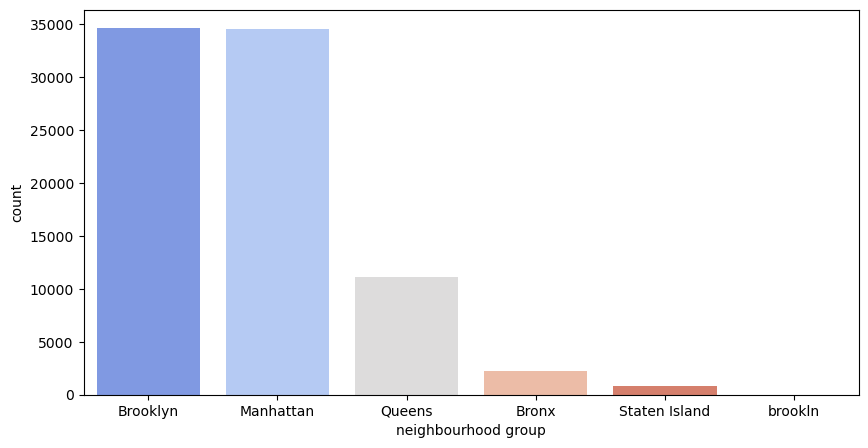

In [18]:
sort_order = df.groupby('neighbourhood group').count().sort_values(by = 'id',ascending=False).index

plt.figure(figsize=[10,5])
base_color = sns.color_palette('coolwarm',n_colors=5)

graph = sns.countplot(x='neighbourhood group', data=df,palette = base_color,order=sort_order)
plt.show()


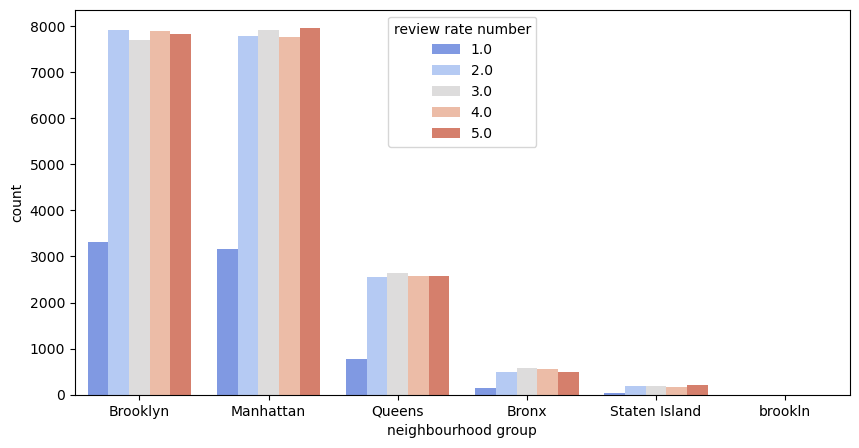

In [19]:
sort_order = df.groupby('neighbourhood group').count().sort_values(by = 'id',ascending=False).index

plt.figure(figsize=[10,5])
base_color = sns.color_palette('coolwarm',n_colors=5)

graph = sns.countplot(x='neighbourhood group', data=df,palette = base_color,order=sort_order,hue='review rate number')
plt.show()

## Q3.How many room types are in the data and what are their proportions?

In [22]:
df['room type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [24]:
df['room type'].value_counts()

Entire home/apt    44173
Private room       37503
Shared room         1646
Hotel room           108
Name: room type, dtype: int64

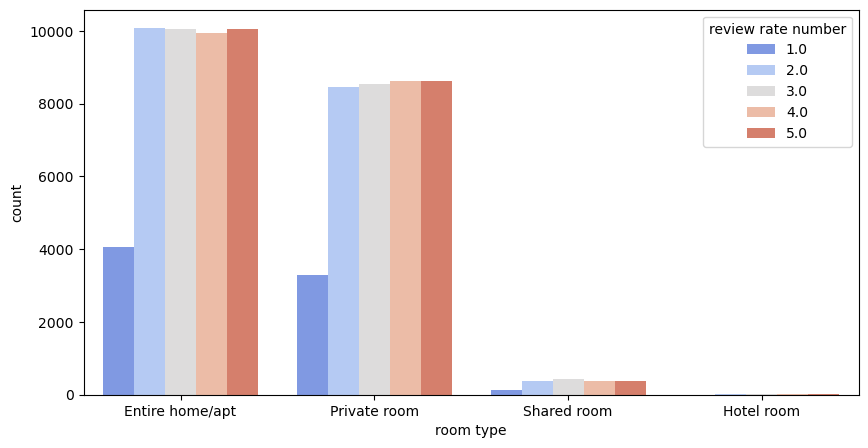

In [35]:
sort_order = df.groupby('room type').count().sort_values(by = 'id',ascending=False).index

plt.figure(figsize=[10,5])
base_color = sns.color_palette('coolwarm',n_colors=5)
graph = sns.countplot(x='room type', data=df,palette = base_color,order=sort_order,hue='review rate number')
plt.show()

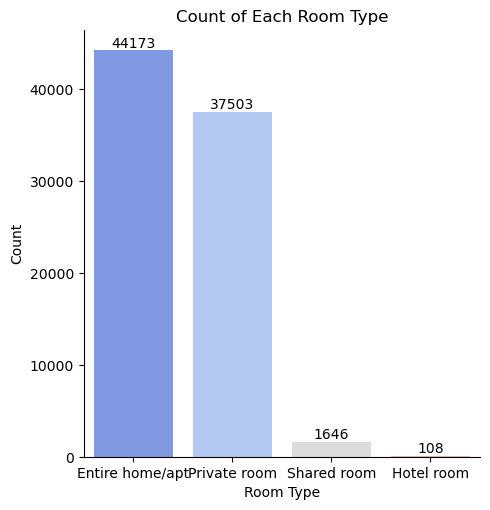

In [38]:
sort_order = df.groupby('room type').count().sort_values(by = 'id',ascending=False).index
base_color = sns.color_palette('coolwarm',n_colors=5)

seabon_barplot = sns.catplot(
    data = df,
    kind = "count",
    x = "room type",
    palette = base_color,
    order=sort_order
    )

plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Count of Each Room Type')

#將 Frequency count 標記到 barplot 上面
for ax in seabon_barplot.axes.flat:
    ax.bar_label(ax.containers[0])


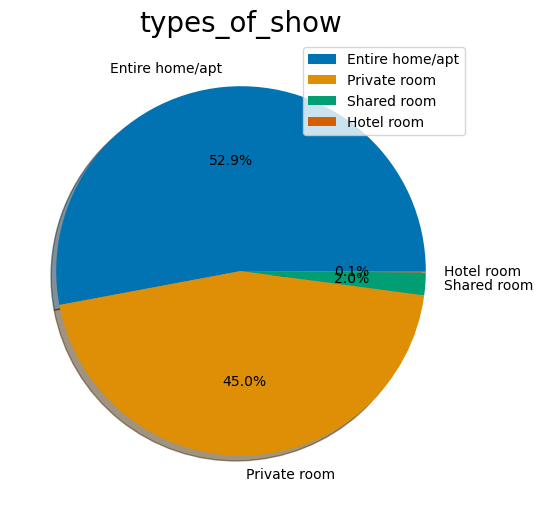

In [47]:
sns.set_palette("colorblind")
df['room type'].value_counts().plot.pie(autopct='%.1f%%', shadow=True, legend= True, figsize=(6,6))
plt.title('types_of_show', fontsize=20)
plt.ylabel('')
plt.show()

### 自己畫好玩

In [55]:
df['price']=df['price'].str.replace('$','')
df['price']=df['price'].str.replace(',','')
df['price']=df['price'].astype(int)
df.info()

AttributeError: Can only use .str accessor with string values!

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83430 entries, 0 to 102040
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83430 non-null  int64         
 1   NAME                            83430 non-null  object        
 2   host id                         83430 non-null  int64         
 3   host_identity_verified          83430 non-null  object        
 4   host name                       83430 non-null  object        
 5   neighbourhood group             83430 non-null  object        
 6   neighbourhood                   83430 non-null  object        
 7   lat                             83430 non-null  float64       
 8   long                            83430 non-null  float64       
 9   country                         83430 non-null  object        
 10  cancellation_policy             83430 non-null  object        
 11  r

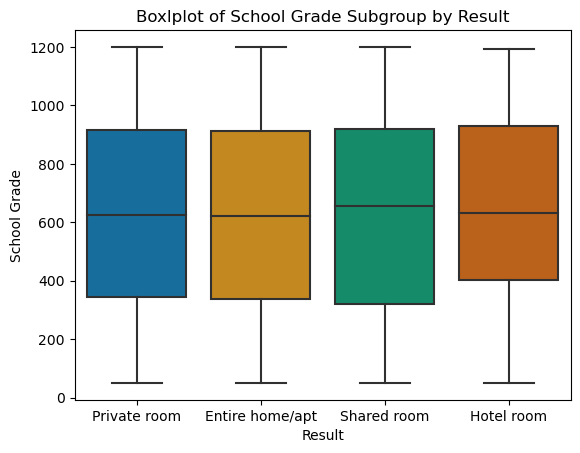

In [58]:
# 創建一個 seaborn boxplot
# data = transfer_data : 用轉學考資料
# y = "school_grade" : 用轉學考資料中 column 為 education_source 的資料
# x = "result_text" : 用轉學考資料中 column 為 education_source 的資料進行分層
seaborn_boxplot = sns.boxplot(data = df, x = 'room type', y = 'price')

#x, y, 標題名字
seaborn_boxplot.set(
    xlabel = 'Result', 
    ylabel = 'School Grade',
    title = 'Boxlplot of School Grade Subgroup by Result'
    )

plt.show()